## 부스팅
+ 배깅처럼 무작위로 표본을 추출해서 분석하는 것보다 약간의 가능성이 높은 규칙을 결합시켜 보다 정확한 예측모델을 만들어 내는 것을 의미
+ 즉, **약한 모델** 여러 개를 결합시켜 **강한 모델**을 만들어 냄
    - 이전 분류기가 틀린 부분을 적응형으로 바꿔가며 잘못 분류되는 데이터를 올바르게 분류할 수 있도록 개선
+ 또한, 배깅은 여러 분류기를 병렬로 연결해서 각 분류기로부터 얻어진 결과를 한번에 모두 고려
    - 각 분류기가 학습시 상호 영향주지 않음
+ 반면, 부스팅은 순차적으로 연결해서 전 단계 분류기의 결과가 다음 단계의 분류기의 학습과 결과에 영향을 미침
+ sklearn에서는 GradientBoostingClassifier를 제공
+ 다양한 부스팅 분류기
    - AdaBoost      : 가중치 기반 부스팅 기법
    - GradientBoost : 잔여오차 기반 부스팅 기법
    - XGBoost       : GB 개량 부스팅 기법
    - LightGBM      : XGB 개량 부스팅 기법 (recommended)

<img src='img/boosting.png'>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mldlpy3

In [128]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier


ImportError: cannot import name 'XGBoost' from 'sklearn.ensemble' (/opt/miniconda3/lib/python3.7/site-packages/sklearn/ensemble/__init__.py)

In [28]:
X, y = make_blobs(n_samples=350, centers=4, random_state=2111121010, cluster_std=1.0)

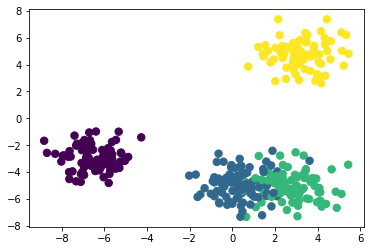

In [29]:
plt.scatter(X[:,0], X[:,1], c=y, s=55)

In [31]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, stratify = y, random_state=2111121010)

#### 의사결정나무(배깅)

In [32]:
dcf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=300, max_samples=175, bootstrap=True)

In [33]:
dcf.fit(Xtrain, ytrain)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=175,
                  n_estimators=300)

In [34]:
pred = dcf.predict(Xtest)

In [35]:
print(dcf.score(Xtrain, ytrain), accuracy_score(ytest, pred))

1.0 0.9428571428571428


/home/hadoop/mldlpy3.py:29: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  edgecolors='k')


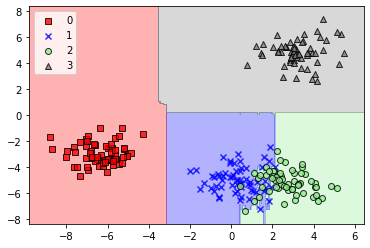

In [36]:
mldlpy3.plot_decision_regions(Xtrain, ytrain, dcf)

#### 랜덤포레스트

In [37]:
rfcf = RandomForestClassifier()

In [38]:
rfcf.fit(Xtrain, ytrain)

RandomForestClassifier()

In [39]:
pred = rfcf.predict(Xtest)

In [40]:
print(dcf.score(Xtrain, ytrain), accuracy_score(ytest, pred))

1.0 0.9428571428571428


/home/hadoop/mldlpy3.py:29: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  edgecolors='k')


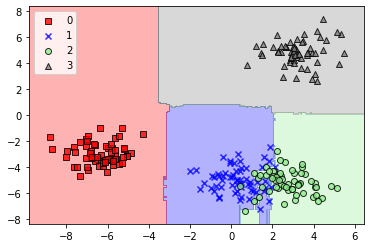

In [41]:
mldlpy3.plot_decision_regions(Xtrain, ytrain, rfcf)

#### 아다부스트 분류기
+ #### AdaBoostClassifier(분류기, 옵션)
+ #### n_estimators : 분류기 갯수
+ #### learning_rate : 학습률 지정
+ #### algorithm : 학습시 사용할 알고리즘
+ #### SAMME.R : soft voting 방식으로 가중치 부여 (확률)
+ #### SAMME   : hard voting 방식으로 가중치 부여 (값)

In [84]:
adc = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=300, learning_rate=0.05, algorithm='SAMME.R')

In [85]:
adc.fit(Xtrain, ytrain)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=0.05,
                   n_estimators=300)

In [86]:
pred = adc.predict(Xtest)

In [87]:
adc.score(Xtrain, ytrain), accuracy_score(ytest, pred)

(1.0, 0.9238095238095239)

/home/hadoop/mldlpy3.py:29: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  edgecolors='k')


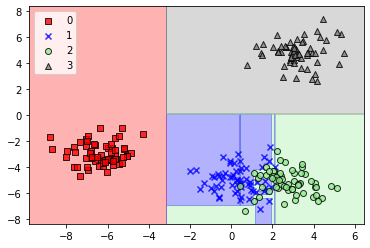

In [88]:
mldlpy3.plot_decision_regions(Xtrain, ytrain, adc)

#### 그라디언트 부스트 분류기

In [123]:
gdc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.007, max_depth=3)

In [124]:
gdc.fit(Xtrain, ytrain)

GradientBoostingClassifier(learning_rate=0.007)

In [125]:
pred = gdc.predict(Xtest)

In [126]:
gdc.score(Xtrain, ytrain), accuracy_score(ytest, pred)

(0.9551020408163265, 0.9523809523809523)

/home/hadoop/mldlpy3.py:29: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  edgecolors='k')


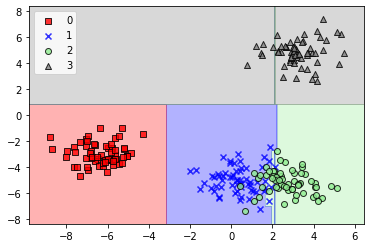

In [127]:
mldlpy3.plot_decision_regions(Xtrain, ytrain, gdc)

### XGBoost 
+ 캐글 데이터 분석 경진대회 우승자들이 자주 사용했던 분석기
+ GBM 분석기법 대비 속도와 성능을 향상시켰음
+ XGBoost 핵심 라이브러리는 C/C++로 작성됨
    - 따라서, sklearn에서 연동하려면 래퍼클래스를 사용해야 함

In [131]:
import xgboost as xgb

In [132]:
xgb.__version__

'1.5.0'

#### XGBoost 분류기 설정
+ 기본 분류기와의 차이점은 XGBoost만을 위한 별도 학습용/평가용 객체 DMatrix를 생성해야 함

In [134]:
dmtrain = xgb.DMatrix(data = Xtrain, label = ytrain)
dmtest = xgb.DMatrix(data = Xtest, label = ytest)

#### 분류기 반복횟수/매개변수 지정
+ eta : learning rate와 유사

+ objective : 분류시 사용할 목적함수 지정

    - 'reg': 'linear'  : 회귀
    
    - 'binary' : 'logistic' : 이진분류
    
    - 'multi : softmax'     : 다중분류, hard voting
    
    - 'multi : softprob'    : 다중분류, soft voting
    
+ eval_metric : 오차 검증시 사용할 함수 지정
    - 'rmse' : 회귀분석시 평균제곱근 오차 사용
    
    - 'mae' : 회귀분석시 평균절대값 오차 사용
    
    - 'logloss' : 이진분류분석시 최대우도 사용
    
    - 'error' : 이진분류분석시 분류오차율 사용
    
    - 'mlogloss' : 다중분류분석시 최대우도 사용
    
    - 'merror' : 다중분류분석시 분류오차율 사용
    
    - 'auc' : 분류분석시 auc 사용
    
+ early_stopping : eval_metric에 의해 성능개선이 없을 경우 분석을 중단할 최대 반복 횟수

In [136]:
num_rounds = 500
params = {'max_depth':3, 'eta':0.1, 'objective':'multi:softmax', 'eval_metric':'mlogloss', 'early_stopping':100, 'num_class':4,}

In [137]:
wlist = [(dmtrain, 'train'), (dmtest, 'test')]

In [140]:
xgb_model = xgb.train(params, dmtrain, num_rounds, evals=wlist, verbose_eval=0)

[11:34:50] WARNING: ../src/learner.cc:576: 
Parameters: { "early_stopping" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [141]:
pred = xgb_model.predict(dmtest)
accuracy_score(pred,ytest)

0.9333333333333333

#### sklearn 래퍼클래스로 XGBoost 분류기 분석

In [143]:
from xgboost import XGBClassifier

In [144]:
xgbc = XGBClassifier(slient=False, n_estimators=100, learning_rate=0.1, max_depth=3, objective='multi:softmax', booster = 'gbtree')

In [149]:
xgbc.fit(Xtrain, ytrain, eval_metric='mlogloss') # early_stopping_rounds=50

[11:42:21] WARNING: ../src/learner.cc:576: 
Parameters: { "slient" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=1,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              slient=False, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [150]:
pred = xgb_model.predict(dmtest)
accuracy_score(pred,ytest)

0.9333333333333333

/home/hadoop/mldlpy3.py:29: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  edgecolors='k')


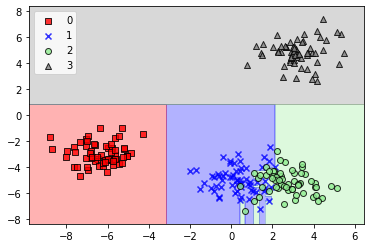

In [151]:
mldlpy3.plot_decision_regions(Xtrain, ytrain, xgbc)

#### LightGBM
+ lightgbm.readthedocs.io
+ 부스팅 계열 분석 알고리즘에서 가장 각광받는 분류기
+ XGB는 다른 알고리즘보다 성능이 좋지만 느리고 메모리를 많이 사용한다는 단점이 존재
+ 그에 비해 LGB는 속도도 빠르고 메모리도 작게 사용
    - 즉, XGB의 단점을 보완하고 장점을 수용한 분류기

#### LightGB 분류기 설정
+ 기존 분류기와의 차이점 : LightGB만을 위한 별도 학습용/평가용 객체 생성 필요
+ Dataset이라는 함수 사용

In [199]:
from lightgbm import LGBMClassifier

In [201]:
lgbmc = LGBMClassifier(slient=False,
                    n_estimators=100, learning_rate=0.006,
                    max_depth=3, objective='multiclass', booster='gbdt')
lgbmc.fit(Xtrain, ytrain, eval_metric='logloss')
pred = lgbmc.predict(Xtest)
accuracy_score(pred, ytest)

[LightGBM] [Warning] Unknown parameter: booster
[LightGBM] [Warning] Unknown parameter: slient


0.9428571428571428

In [250]:
import lightgbm as lgb

In [251]:
lgbtrain = lgb.Dataset(Xtrain, label=ytrain)
lgbtest = lgb.Dataset(Xtest, label=ytest)

In [252]:
params = {'max_depth':3, 'learning_rate':0.1,

          'objective':'multiclass',

          'metric':'multi_logloss',

          'num_class':4, 'boosting':'gbdt'}

In [ ]:
lgbm = lgb.train(params, lgbtrain, 500, lgbtest, early_stopping_rounds=50)
pred = lgbm.predict(Xtest)

In [248]:
pred[[1]]

array([[4.56166888e-04, 9.99543833e-01, 4.27070810e-17, 4.27070810e-17]])

In [249]:
pred = np.argmax(pred, axis=1)
accuracy_score(pred,ytest)

1.0

#### 결론 : 각 분류기별 학습률 차이 나열하기

#### 테스트 데이터 2번

#### 아다부스트

In [256]:
X, y = make_moons(n_samples=250, noise=0.05, random_state = 2111121250)

In [257]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, stratify = y, random_state=2111111615)

In [204]:
adc2 = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=300, learning_rate=0.05, algorithm='SAMME.R')

In [205]:
adc.fit(Xtrain, ytrain)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=0.05,
                   n_estimators=300)

In [206]:
pred = adc.predict(Xtest)

In [207]:
adc.score(Xtrain, ytrain), accuracy_score(ytest, pred)

(1.0, 0.9733333333333334)

/home/hadoop/mldlpy3.py:29: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  edgecolors='k')


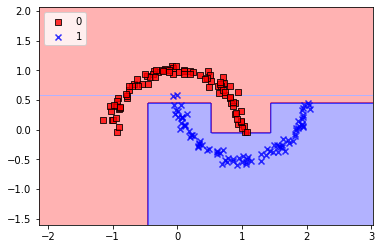

In [208]:
mldlpy3.plot_decision_regions(Xtrain, ytrain, adc)

#### 그라디언트 부스트

In [221]:
gdc2 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.007, max_depth=3)

In [222]:
gdc2.fit(Xtrain, ytrain)

GradientBoostingClassifier(learning_rate=0.007)

In [223]:
pred = gdc2.predict(Xtest)

In [224]:
gdc2.score(Xtrain, ytrain), accuracy_score(ytest, pred)

(0.9314285714285714, 0.88)

/home/hadoop/mldlpy3.py:29: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  edgecolors='k')


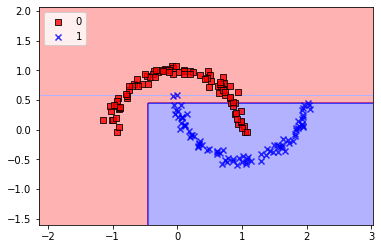

In [225]:
mldlpy3.plot_decision_regions(Xtrain, ytrain, gdc2)

#### XGBoost

In [227]:
dmtrain2 = xgb.DMatrix(data = Xtrain, label = ytrain)
dmtest2 = xgb.DMatrix(data = Xtest, label = ytest)

In [228]:
num_rounds = 500
params = {'max_depth':3, 'eta':0.1, 'objective':'multi:softmax', 'eval_metric':'mlogloss', 'early_stopping':100, 'num_class':4,}

In [229]:
wlist = [(dmtrain2, 'train'), (dmtest2, 'test')]

In [230]:
xgb_model = xgb.train(params, dmtrain2, num_rounds, evals=wlist, verbose_eval=0)

[13:06:11] WARNING: ../src/learner.cc:576: 
Parameters: { "early_stopping" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [231]:
pred = xgb_model.predict(dmtest2)
accuracy_score(pred,ytest)

1.0

In [258]:
xgbc2 = XGBClassifier(slient=False, n_estimators=100, learning_rate=0.1, max_depth=3, objective='multi:softmax', booster = 'gbtree')

In [ ]:
xgbc2.fit(Xtrain, ytrain, eval_metric='mlogloss')

In [ ]:
pred = xgb_model.predict(dmtest)
accuracy_score(pred,ytest)

In [ ]:
mldlpy3.plot_decision_regions(Xtrain, ytrain, xgbc2)

#### lightGBM

In [ ]:
lgbmc2 = LGBMClassifier(slient=False,
                    n_estimators=100, learning_rate=0.006,
                    max_depth=3, objective='multiclass', booster='gbdt')
lgbmc2.fit(Xtrain, ytrain, eval_metric='logloss')
pred = lgbmc2.predict(Xtest)
accuracy_score(pred, ytest)

### 테스트 데이터 3번

In [262]:
X, y = make_circles(n_samples=250, noise=0.05, random_state = 2111121250)

In [263]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, stratify = y, random_state=2111111615)

In [264]:
adc3 = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=300, learning_rate=0.05, algorithm='SAMME.R')

In [265]:
adc3.fit(Xtrain, ytrain)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=0.05,
                   n_estimators=300)

In [266]:
pred = adc3.predict(Xtest)

In [267]:
adc.score(Xtrain, ytrain), accuracy_score(ytest, pred)

(0.5371428571428571, 0.8933333333333333)

/home/hadoop/mldlpy3.py:29: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  edgecolors='k')


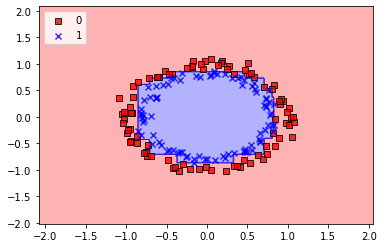

In [268]:
mldlpy3.plot_decision_regions(Xtrain, ytrain, adc3)